##### Dataset

In [99]:
# Social_Network_Ads.csv
# Location: https://mitu.co.in/dataset

##### Import the libraries

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Read the dataset

In [101]:
df = pd.read_csv('Social_Network_Ads.csv')

In [102]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [103]:
df.shape

(400, 5)

In [104]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

##### Separate the input and output data

In [105]:
# input 
x = df[['Age','EstimatedSalary']]

# output
y = df['Purchased']

##### Exploratory Data Analysis

In [106]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


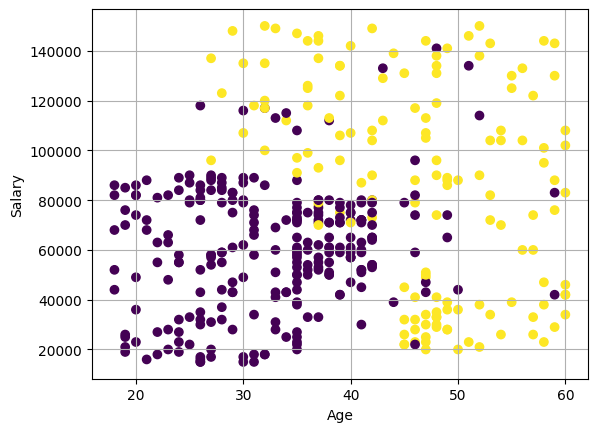

In [107]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x['Age'], x['EstimatedSalary'], c = y)

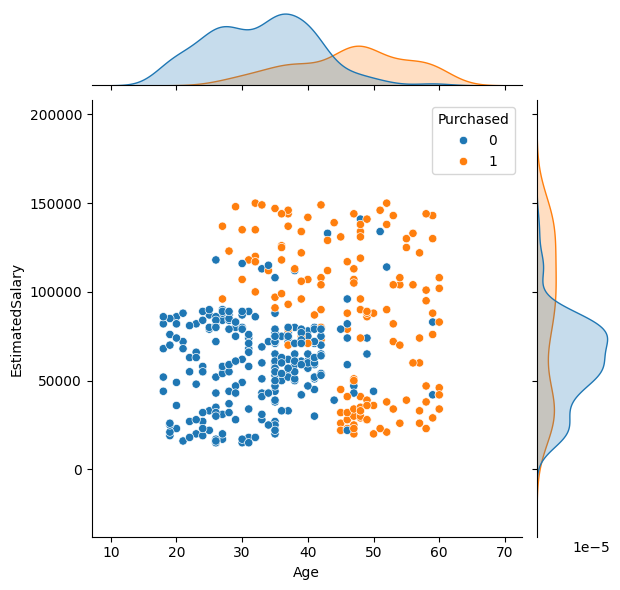

In [108]:
sns.jointplot(x='Age', y='EstimatedSalary', data = df, hue='Purchased')

In [109]:
set(y)

{0, 1}

In [110]:
np.unique(y)

array([0, 1])

In [111]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

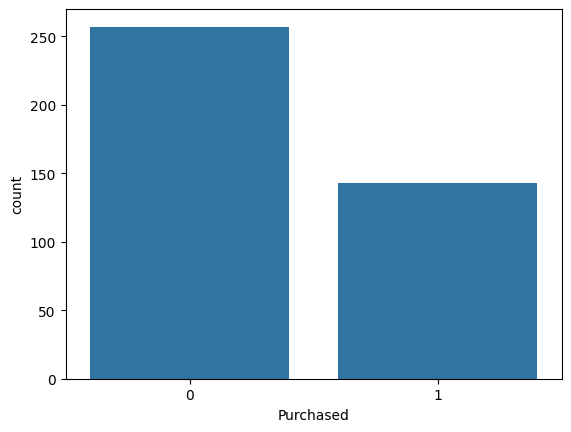

In [112]:
sns.countplot(x = y);

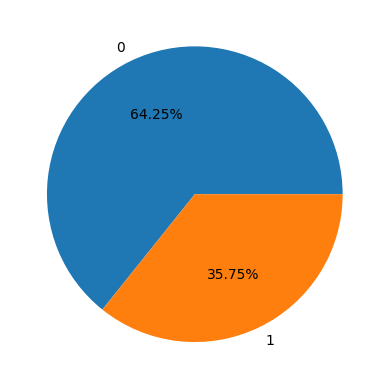

In [113]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%');

##### Feature Scaling

In [114]:
from sklearn.preprocessing import MinMaxScaler

In [115]:
scaler = MinMaxScaler()

In [116]:
x_scaled = scaler.fit_transform(x)

In [117]:
x_scaled

array([[0.02380952, 0.02962963],
       [0.4047619 , 0.03703704],
       [0.19047619, 0.20740741],
       [0.21428571, 0.31111111],
       [0.02380952, 0.45185185],
       [0.21428571, 0.31851852],
       [0.21428571, 0.51111111],
       [0.33333333, 1.        ],
       [0.16666667, 0.13333333],
       [0.4047619 , 0.37037037],
       [0.19047619, 0.48148148],
       [0.19047619, 0.27407407],
       [0.04761905, 0.52592593],
       [0.33333333, 0.02222222],
       [0.        , 0.4962963 ],
       [0.26190476, 0.48148148],
       [0.69047619, 0.07407407],
       [0.64285714, 0.08148148],
       [0.66666667, 0.0962963 ],
       [0.71428571, 0.1037037 ],
       [0.64285714, 0.05185185],
       [0.69047619, 0.25185185],
       [0.71428571, 0.19259259],
       [0.64285714, 0.05185185],
       [0.66666667, 0.05925926],
       [0.69047619, 0.03703704],
       [0.73809524, 0.0962963 ],
       [0.69047619, 0.11111111],
       [0.26190476, 0.20740741],
       [0.30952381, 0.02222222],
       [0.

##### Cross-validation

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [120]:
x_train.shape

(300, 2)

In [121]:
x_test.shape

(100, 2)

##### Build the tree model

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
tree = DecisionTreeClassifier(random_state=0, criterion='entropy')

In [125]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

##### Performance Analysis

In [126]:
y_pred = tree.predict(x_test)

In [127]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.91

In [129]:
y_test.value_counts()

Purchased
0    68
1    32
Name: count, dtype: int64

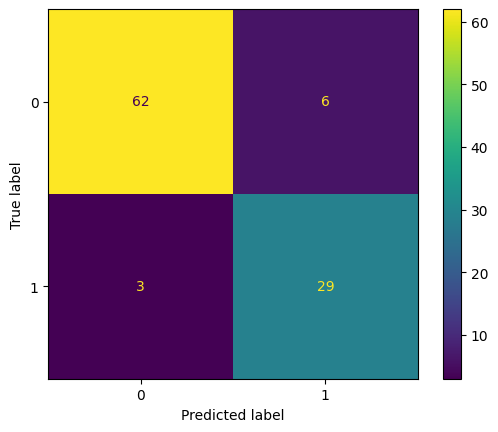

In [130]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [84]:
from sklearn.metrics import classification_report

In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



In [132]:
# Accuracy of class - 0 / Sensitivity
r0 = 62/68
r0

0.9117647058823529

In [133]:
# Accuracy of class - 1 / Specificity
r1 = 28/32
r1

0.875

In [134]:
# Positive Predictive Value - 0
p0 = 62/ 66
p0

0.9393939393939394

In [135]:
# Negative Predictive Value - 1
p1 = 28/34
p1

0.8235294117647058

In [136]:
# Harmonic Mean
f0 = 2 * p0 * r0 / (p0 + r0)
f0

0.9253731343283583

In [137]:
# Harmonic Mean
f1 = 2 * p1 * r1 / (p1 + r1)
f1

0.8484848484848485

##### Feature Importances

<BarContainer object of 2 artists>

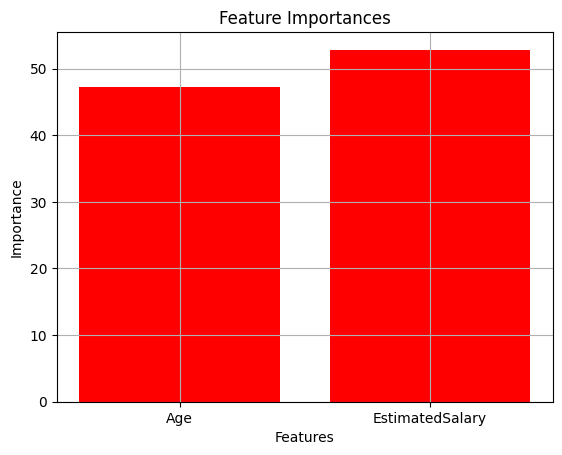

In [138]:
plt.title('Feature Importances')
plt.grid()
plt.xlabel('Features')
plt.ylabel('Importance')
plt.bar(x.columns, tree.feature_importances_*100, color = 'r')

In [139]:
tree.feature_importances_

array([0.47180519, 0.52819481])

##### Plot the tree

In [140]:
from sklearn.tree import plot_tree

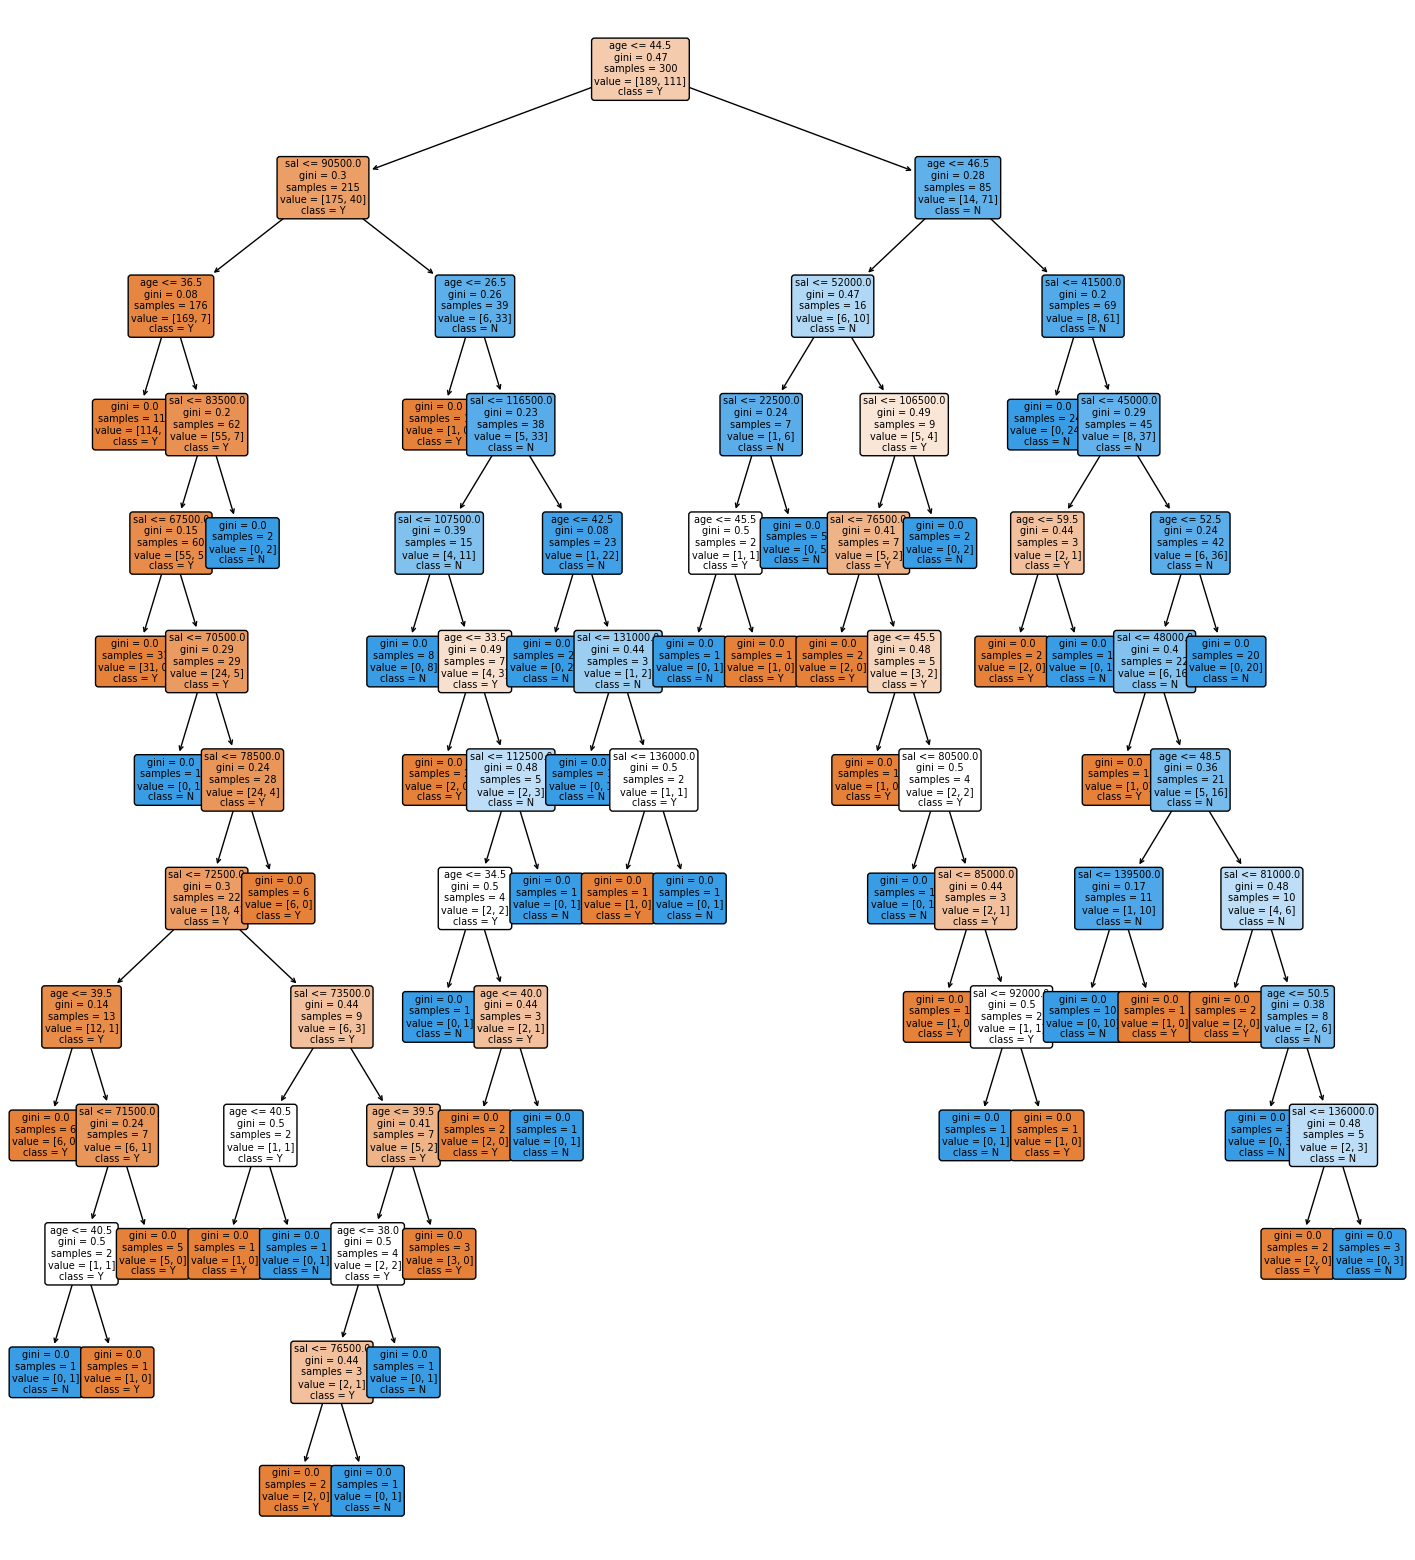

In [95]:
plt.figure(figsize=(18,20))
plot_tree(tree, fontsize=7, filled=True, class_names=['Y','N'],
         feature_names=['age','sal'], rounded=True, precision=2);

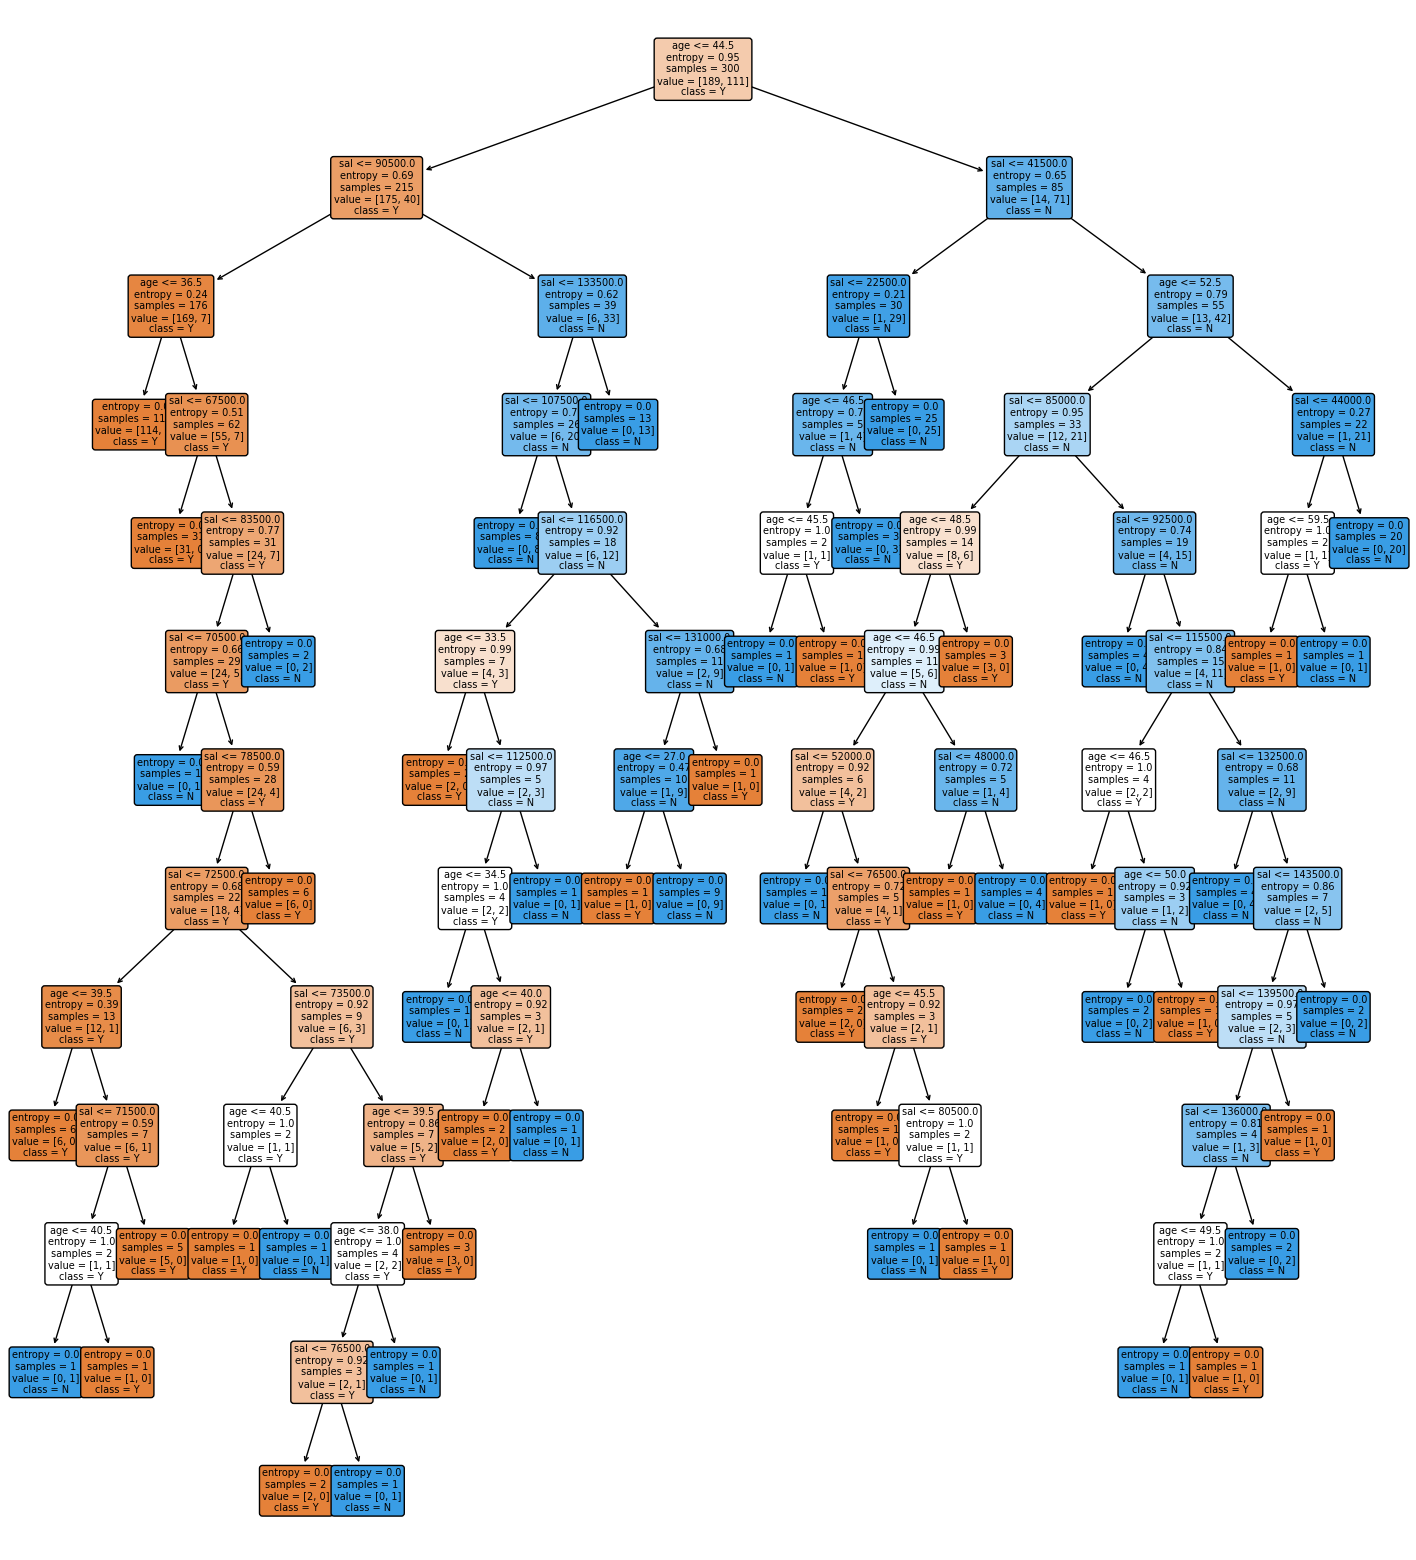

In [141]:
plt.figure(figsize=(18,20))
plot_tree(tree, fontsize=7, filled=True, class_names=['Y','N'],
         feature_names=['age','sal'], rounded=True, precision=2);

##### Predict on unseen data

In [142]:
new = pd.DataFrame({
    'Age': [45,22,58],
    'EstimatedSalary': [78000,45600,134000]
})

In [143]:
new

,Age,EstimatedSalary
0,45,78000
1,22,45600
2,58,134000


In [144]:
tree.predict(new)

array([0, 0, 1])